# ***Time Series Forecating Prject(BitPredict 💰📈)***

- Get time series data (the historical price of Bitcoin)
 - Load in time series data using pandas/Python's CSV module
-Format data for a time series problem
  
 - Creating training and test sets  
 - Visualizing time series data
 - Turning time series data into a supervised learning problem (windowing)
 - Preparing univariate and multivariate (more than one variable) data
- Evaluating a time series forecasting model
- Setting up a series of deep learning modelling experiments
 - Dense (fully-connected) networks
 - Sequence models (LSTM and 1D CNN)
 - Ensembling (combining multiple models together)
 - Multivariate models
 - Replicating the N-BEATS algorithm using TensorFlow layer subclassing
- Creating a modelling checkpoint to save the best performing model during training
- Making predictions (forecasts) with a time series model
- Creating prediction intervals for time series model forecasts

In [2]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-02-16 11:52:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.04s   

2025-02-16 11:52:23 (4.85 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Reading CSV file with pandas

In [4]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"]
                )

In [5]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


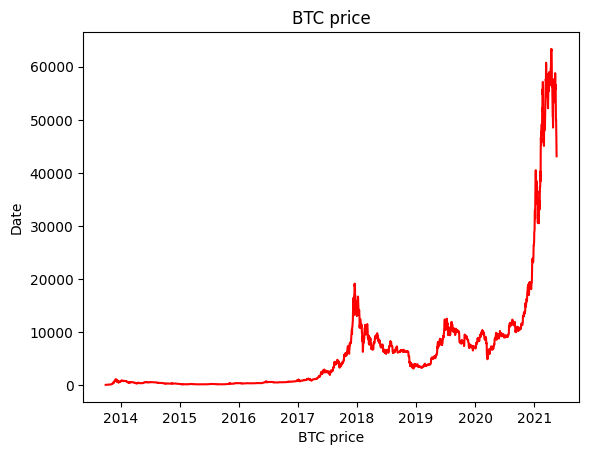

In [7]:
# visualize the closing prize
import matplotlib.pyplot as plt
bitcoin_price=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" : "Price"})
plt.plot(df.index,df["Closing Price (USD)"],color='r')
plt.xlabel("BTC price")
plt.ylabel("Date")
plt.title("BTC price")
plt.show()



In [8]:
bitcoin_price.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


## Reading CSV File with python csv

In [9]:
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",")
  next(csv_reader) #skip the first line (this gets rid of column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))


In [10]:
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

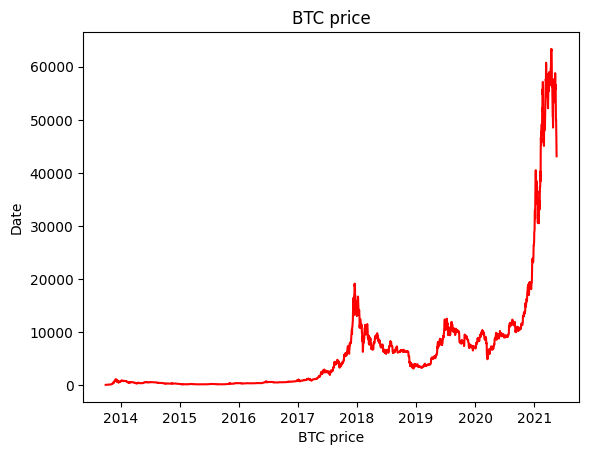

In [11]:
plt.plot(timesteps,btc_price,color="r")
plt.xlabel("BTC price")
plt.ylabel("Date")
plt.title("BTC price")
plt.show()

## Splitting data into train and test

In [12]:
timesteps = bitcoin_price.index.to_numpy()
price= bitcoin_price["Price"].to_numpy()

timesteps[:10], price[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [13]:
split_size=int(len(timesteps)*0.8)

X_train,y_train=timesteps[:split_size],price[:split_size]
X_test,y_test=timesteps[split_size:],price[split_size:]

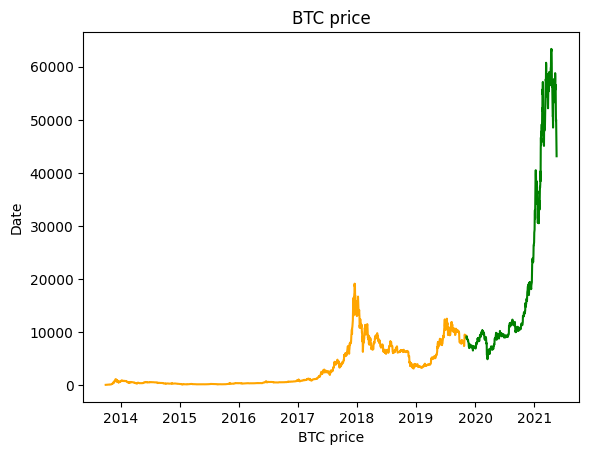

In [14]:
# visulaize the train and test datset
plt.plot(X_train,y_train,color="orange")
plt.plot(X_test,y_test,color="green")
plt.xlabel("BTC price")
plt.ylabel("Date")
plt.title("BTC price")
plt.show()

In [15]:
def plot_time_series(timesteps,values,format='.',start=0,end=None,label=None):

  plt.plot(timesteps[start:end],values[start:end],format,label=label)

  plt.xlabel("Time")
  plt.ylabel("BTC price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


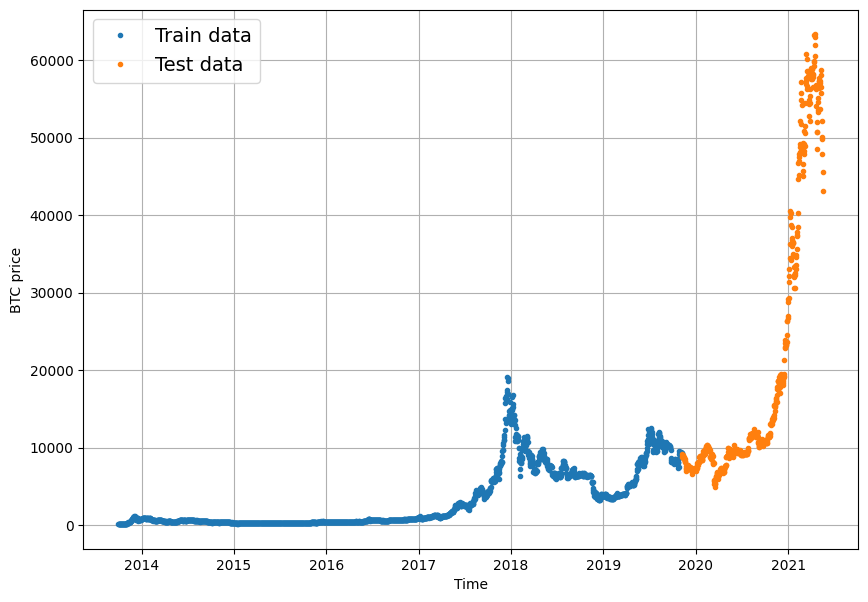

In [16]:
plt.figure(figsize=(10,7))
plot_time_series(X_train,y_train,label="Train data")
plot_time_series(X_test,y_test,label="Test data")


##Modelling Experiments

* **horizon** = number of timesteps to predict into future
* **window** = number of timesteps from past used to predict horizon



* 0	Naïve model (baseline)
* 1	Dense model	horizon=1,window=7
* 2	Same as model 1	horizon=1,window=30
* 3	Same as model 1 horizon=7,window=30
* 4	Conv1D
* 5	LSTM
* 6	Same as 1 (but with multivariate data)
* 7	N-BEATs Algorithm
* 8	Ensemble (multiple models optimized on different loss functions)
* 9	Future prediction model (model to predict future values)
* 10	Same as 1 (but with turkey 🦃 data introduced)

## Model_0 : Base Model

As usual, let's start with a baseline.

One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:
                         
                                 t(y-hat)=t-1(y)


In [17]:
naive_forecasts=y_test[:-1]

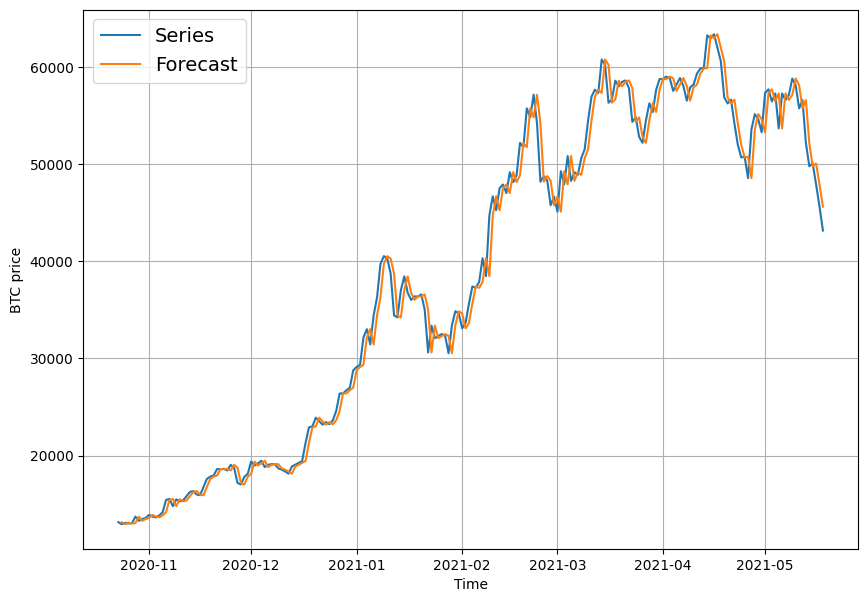

In [18]:
# lets visualize the naive bais model
plt.figure(figsize=(10,7))
plot_time_series(X_test,y_test,start=350,format='-',label="Series")
plot_time_series(X_test[1:],naive_forecasts,start=350,format='-',label="Forecast")

plt.show()

In [19]:
import tensorflow as tf
import numpy as np

In [20]:
def mean_absolute_scaled_error(y_true,y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season

In [21]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecasts).numpy()

0.9995699939182624

In [22]:
def calculate_results(y_true,y_pred):
  #y_pred=tf.cast(y_pred,tf.float32)
  #y_true=tf.cast(y_true,tf.float32)
  # Reshape y_true to match y_pred's shape if necessary
  if y_true.ndim == 1 and y_pred.ndim == 2 and y_true.shape[0] == y_pred.shape[0]:
    y_true = y_true[:, np.newaxis]  # Add an extra dimension to y_true


  mae=tf.metrics.MeanAbsoluteError(y_true,y_pred)
  mse=tf.metrics.mean_squared_error(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.metrics.mean_absolute_percentage_error(y_true,y_pred)

  mase=mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  dict={"mae" :mae.numpy(),
        "mse": mse.numpy(),
        "rmse":rmse.numpy(),
        "mape":mape.numpy(),
        "mase":mase.numpy()}
  return dict


In [23]:
def calculate_results(y_true, y_pred):
  """
  Calculates MAE, MSE, RMSE, MAPE, and MASE.

  Args:
    y_true: Ground truth values.
    y_pred: Predicted values.

  Returns:
    A dictionary containing the calculated metrics.
  """
  # Reshape y_true to match y_pred's shape if necessary
  if y_true.ndim == 1 and y_pred.ndim == 2 and y_true.shape[0] == y_pred.shape[0]:
    y_true = y_true[:, np.newaxis]  # Add an extra dimension to y_true

  # Initialize the metrics
  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mse_metric = tf.keras.metrics.MeanSquaredError()
  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

  # Update the metrics with the data
  mae_metric.update_state(y_true, y_pred)
  mse_metric.update_state(y_true, y_pred)
  mape_metric.update_state(y_true, y_pred)

  # Get the results
  mae = mae_metric.result().numpy()
  mse = mse_metric.result().numpy()
  rmse = np.sqrt(mse)
  mape = mape_metric.result().numpy()
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

  # Store the results in a dictionary
  results_dict = {
      "mae": mae,
      "mse": mse,
      "rmse": rmse,
      "mape": mape,
      "mase": mase
  }

  return results_dict

In [24]:
y_test[1:].shape,naive_forecasts.shape

((557,), (557,))

In [25]:
naive_results=calculate_results(y_true=y_test[1:],y_pred=naive_forecasts)
naive_results

{'mae': 567.9802,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.9995699939182624}

In [26]:
def calculate_results(y_true, y_pred):
  """
  Calculates MAE, MSE, RMSE, MAPE, and MASE.

  Args:
    y_true: Ground truth values.
    y_pred: Predicted values.

  Returns:
    A dictionary containing the calculated metrics.
  """
  # Reshape y_true to match y_pred's shape if necessary
  if y_true.ndim == 1 and y_pred.ndim == 2 and y_true.shape[0] == y_pred.shape[0]:
    y_true = y_true[:, np.newaxis]  # Add an extra dimension to y_true

  # Initialize the metrics
  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mse_metric = tf.keras.metrics.MeanSquaredError()
  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

  # Update the metrics with the data
  mae_metric.update_state(y_true, y_pred)
  mse_metric.update_state(y_true, y_pred)
  mape_metric.update_state(y_true, y_pred)

  # Get the results
  mae = mae_metric.result().numpy()
  mse = mse_metric.result().numpy()
  rmse = np.sqrt(mse)
  mape = mape_metric.result().numpy()
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

  # Store the results in a dictionary
  results_dict = {
      "mae": mae,
      "mse": mse,
      "rmse": rmse,
      "mape": mape,
      "mase": mase
  }

  return results_dict

In [27]:
HORIZON=1
WINDOW_SIZE=7

In [28]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]


In [29]:
# lets test our function
test_window,test_label=get_labelled_windows(tf.expand_dims(tf.range(8),axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [30]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


In [31]:
windows,labels=make_windows(price,window_size=WINDOW_SIZE,horizon=HORIZON)
len(windows),len(labels)

(2780, 2780)

In [32]:
# create a function split the windows and labels into train and test
def train_test_split(windows,labels,test_size=0.2):
  split_size=(int)(len(windows)*(1-test_size))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]
  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows,train_labels,test_windows,test_labels


In [33]:
train_windows,train_labels,test_windows,test_labels=train_test_split(windows,labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [34]:
len(price)*(1-0.2)

2229.6

In [35]:
import os
# create a model check point callback
def create_model_checkpoint(model_name,file_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(file_path,model_name),
                                            verbose=0,
                                            save_best_only=True)

In [36]:
train_windows.shape

(2224, 7)

# model_1:Dense model(window=7,horizon=1)

In [37]:
# model_0
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense

model_1=Sequential([
    Dense(128,activation='relu'),
    Dense(HORIZON,activation='linear')
],name="model_1_dense")
model_1.compile(loss='mse', optimizer='adam',
                metrics=['mae','mse'])

In [38]:
model_1.fit(train_windows,train_labels,epochs=100,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint("model_1.keras")],)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4731894.0000 - mae: 1204.4823 - mse: 4731894.0000 - val_loss: 20094258.0000 - val_mae: 2910.2922 - val_mse: 20094258.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 719817.5625 - mae: 434.2667 - mse: 719817.5625 - val_loss: 5990519.0000 - val_mae: 1510.9503 - val_mse: 5990519.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 279033.0625 - mae: 248.2139 - mse: 279033.0625 - val_loss: 4401637.5000 - val_mae: 1162.0521 - val_mse: 4401637.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 217830.6719 - mae: 209.9883 - mse: 217830.6719 - val_loss: 4219617.5000 - val_mae: 1179.6257 - val_mse: 4219617.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 194536.1562 - mae: 194.3486 - mse: 194536.1562 - val_loss: 3958590.5000 - val_mae: 1117.3082 - val_mse: 3958590.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 223155.6094 - mae: 194.2130 - mse: 223155.6094 - val_

In [39]:
model_1.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 410918.9062 - mae: 342.2837 - mse: 410918.9062


[1415237.125, 656.7565307617188, 1415237.125]

In [40]:
pred_label=model_1.predict(test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [41]:
pred_label.shape,test_labels.shape

((556, 1), (556, 1))

In [42]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.9995699939182624}

In [43]:
# create a function for predicting the test labels
def make_pred(model,input_data):
  pred=model.predict(input_data)
  return tf.squeeze(pred)

In [44]:
model_1_pred=make_pred(model_1,test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [45]:
model_1_results=calculate_results(tf.squeeze(test_labels),model_1_pred)
model_1_results

{'mae': 656.7565,
 'mse': 1415237.1,
 'rmse': 1189.6375,
 'mape': 3.0421526,
 'mase': 1.1537391526923002}

In [46]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.9995699939182624}

In [47]:
test_labels.shape

(556, 1)

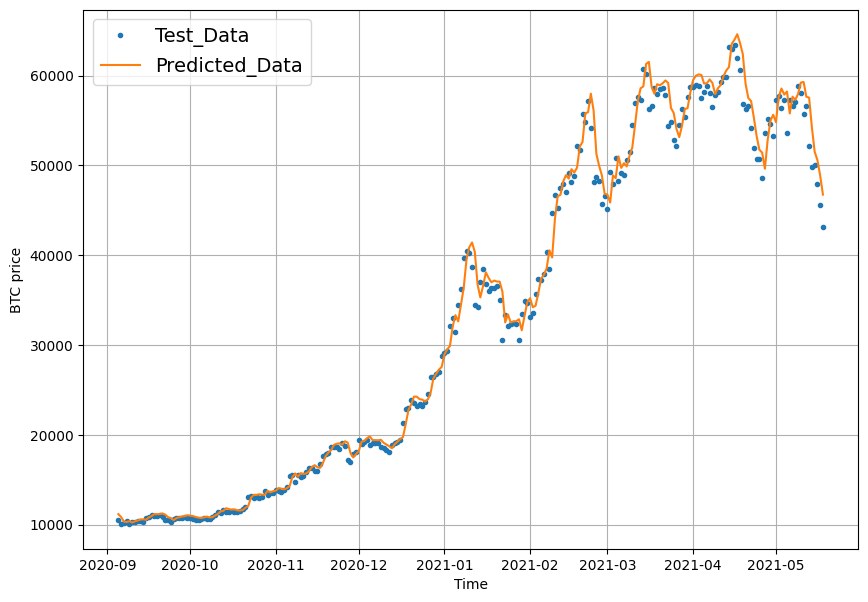

In [48]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:],start=300,label="Test_Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_pred[:],format='-',start=300,label="Predicted_Data")

# Model_2 :Dense (window=30,horizon=1)

In [49]:
HORIZON=1
WINDOW_SIZE=30

In [50]:
windows,labels=make_windows(price,horizon=HORIZON,window_size=WINDOW_SIZE)
len(windows),len(labels)

(2757, 2757)

In [51]:
train_windows,train_labels,test_windows,test_labels=train_test_split(windows,labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2205, 2205, 552, 552)

In [52]:
# Build the model_2 :Dense model
model_2=Sequential([
    Dense(128,activation='relu'),
    Dense(HORIZON,activation='linear')
],name='Model_2_Dense_Model')

model_2.compile(optimizer='adam',
                loss='mse',
                metrics=['mae','mse'])

In [53]:
model_2.fit(train_windows,train_labels,
            validation_data=(test_windows,test_labels),
            epochs=100,
            batch_size=128,
            callbacks=[create_model_checkpoint("model_2.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7027867.0000 - mae: 1443.6910 - mse: 7027867.0000 - val_loss: 31928220.0000 - val_mae: 3807.7400 - val_mse: 31928220.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1169265.7500 - mae: 569.9449 - mse: 1169265.7500 - val_loss: 9553221.0000 - val_mae: 1759.9961 - val_mse: 9553221.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 465978.2812 - mae: 314.6708 - mse: 465978.2812 - val_loss: 8726044.0000 - val_mae: 1759.1226 - val_mse: 8726044.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 384987.3438 - mae: 285.6921 - mse: 384987.3438 - val_loss: 7908703.5000 - val_mae: 1693.9921 - val_mse: 7908703.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 329786.9375 - mae: 258.6438 - mse: 329786.9375 - val_loss: 6524645.0000 - val_mae: 1467.3523 - val_mse: 6524645.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 311165.0625 - mae: 258.8030 - mse: 311165.0625 - val_

In [54]:
model_2_pred=make_pred(model_2,test_windows)
model_2_results=calculate_results(tf.squeeze(test_labels),model_2_pred)
model_2_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


{'mae': 657.50183,
 'mse': 1384734.4,
 'rmse': 1176.7473,
 'mape': 3.0645196,
 'mase': 1.1493194281471724}

In [55]:
model_1_results,naive_results

({'mae': 656.7565,
  'mse': 1415237.1,
  'rmse': 1189.6375,
  'mape': 3.0421526,
  'mase': 1.1537391526923002},
 {'mae': 567.9802,
  'mse': 1147547.1,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.9995699939182624})

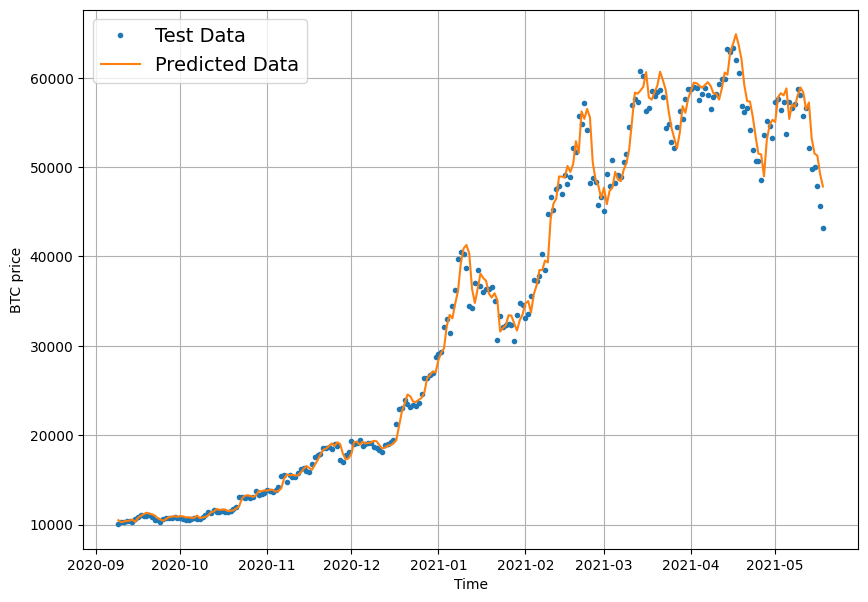

In [56]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[0:],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],format='-',values=model_2_pred,start=offset,label="Predicted Data")

# Model_3: Dense Mode(Window=30,Horizon=7)


In [57]:
HORIZON=7
WINDOW_SIZE=30

In [58]:
windows,labels=make_windows(price,horizon=HORIZON,window_size=WINDOW_SIZE)

In [59]:
train_windows,train_labels,test_windows,test_labels=train_test_split(windows,labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2200, 2200, 551, 551)

In [60]:
train_labels.shape

(2200, 7)

In [61]:
# Build the model_2 :Dense model
model_3=Sequential([
    Dense(128,activation='relu'),
    Dense(HORIZON,activation='linear')
],name='Model_3_Dense_Model')

model_3.compile(optimizer='adam',
                loss='mse',
                metrics=['mae','mse'])

In [62]:
model_3.fit(train_windows,train_labels,
            validation_data=(test_windows,test_labels),
            epochs=100,
            batch_size=128,
            callbacks=[create_model_checkpoint("model_3.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 22817400.0000 - mae: 2465.5239 - mse: 22817400.0000 - val_loss: 20917908.0000 - val_mae: 2820.4209 - val_mse: 20917908.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1787449.7500 - mae: 648.1335 - mse: 1787449.7500 - val_loss: 16416199.0000 - val_mae: 2416.2065 - val_mse: 16416199.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 956436.1875 - mae: 450.8708 - mse: 956436.1875 - val_loss: 15478511.0000 - val_mae: 2337.9607 - val_mse: 15478511.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 727963.8125 - mae: 392.0904 - mse: 727963.8125 - val_loss: 11530744.0000 - val_mae: 1963.9607 - val_mse: 11530744.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 654812.5625 - mae: 365.0133 - mse: 654812.5625 - val_loss: 11967099.0000 - val_mae: 2014.2368 - val_mse: 11967099.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 660985.0625 - mae: 364.2087 - mse: 660985.0

In [63]:
model_3.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1822488.7500 - mae: 689.8727 - mse: 1822488.7500


[6132793.0, 1379.58349609375, 6132793.0]

In [64]:
model_3_pred=tf.squeeze(make_pred(model_3,test_windows))

model_3_results=calculate_results(tf.squeeze(test_labels),model_3_pred)
model_3_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


{'mae': 1379.5835,
 'mse': 6132793.0,
 'rmse': 2476.4478,
 'mape': 6.227505,
 'mase': 2.45489137392353}

In [65]:
model_2_results,naive_results

({'mae': 657.50183,
  'mse': 1384734.4,
  'rmse': 1176.7473,
  'mape': 3.0645196,
  'mase': 1.1493194281471724},
 {'mae': 567.9802,
  'mse': 1147547.1,
  'rmse': 1071.2362,
  'mape': 2.516525,
  'mase': 0.9995699939182624})

In [66]:
model_3_pred.shape,test_labels.shape

(TensorShape([551, 7]), (551, 7))

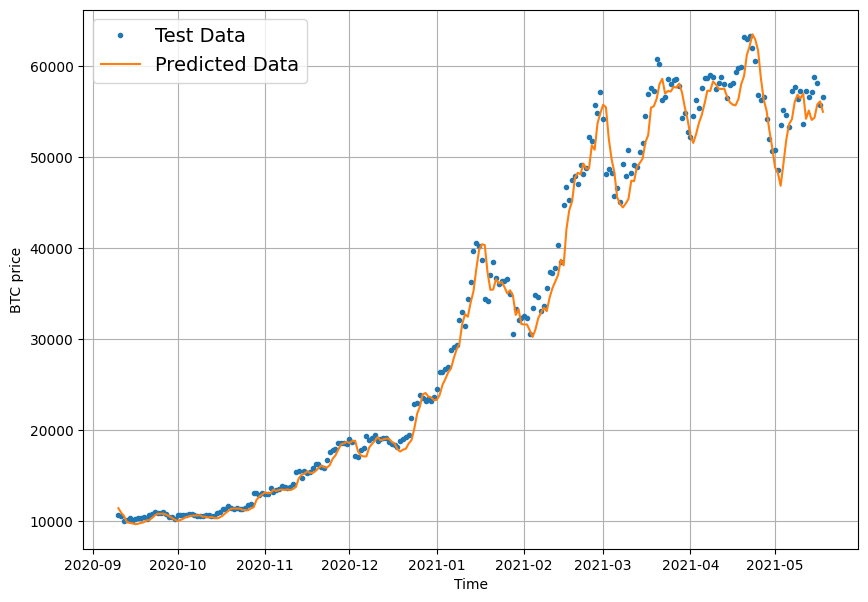

In [67]:
# plot the results of model_3
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=X_test[-len(test_windows):],start=offset,values=test_labels[:,0],label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],start=offset,values=tf.reduce_mean(model_3_pred,axis=1),format='-',label="Predicted Data")

<Axes: >

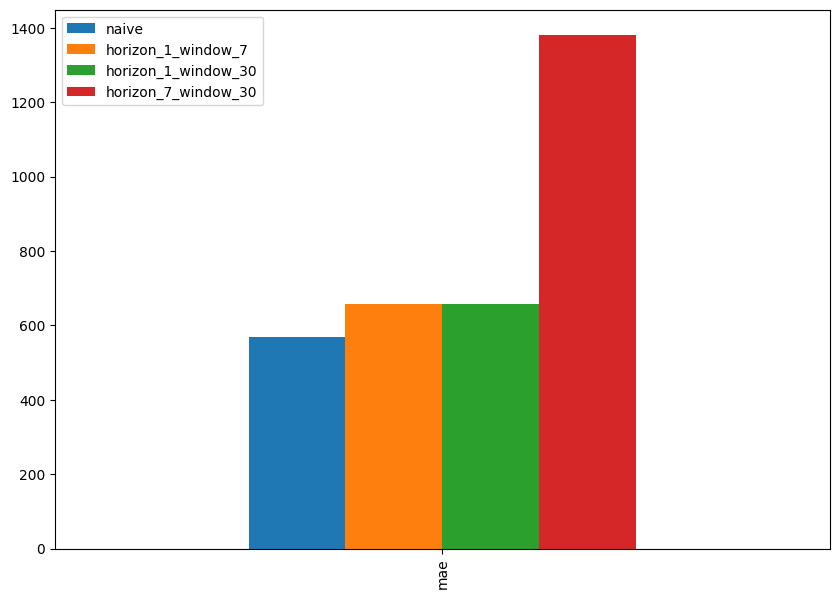

In [68]:
pd.DataFrame({
    "naive":naive_results['mae'],
    "horizon_1_window_7":model_1_results['mae'],
    "horizon_1_window_30":model_2_results['mae'],
    "horizon_7_window_30":model_3_results['mae']
},index=['mae']).plot(figsize=(10,7),kind='bar')

# Model_4 :Conv1D

In [69]:
HORIZON=1
WINDOW_SIZE=7

In [70]:
windows,labels=make_windows(price,horizon=HORIZON,window_size=WINDOW_SIZE)
len(windows),len(labels)

(2780, 2780)

In [71]:
train_windows,train_labels,test_windows,test_labels=train_test_split(windows,labels)
len(train_windows),len(train_labels),len(test_windows),len(test_labels)

(2224, 2224, 556, 556)

In [72]:
# build the model
from tensorflow.keras import layers
model_4=Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(256,5,activation='relu',padding='causal'),
    layers.Conv1D(128,5,activation='relu',padding='causal'),
    layers.Conv1D(64,5,activation='relu',padding='causal'),
    Dense(HORIZON,activation='linear')
])

model_4.compile(optimizer='adam',
                loss='mae',
                metrics=['mae','mse'])


In [73]:
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            epochs=100,
            verbose=0,
            callbacks=[create_model_checkpoint("model_4.keras")])

In [74]:
model_4.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 282.2674 - mae: 282.2674 - mse: 343032.0000


[564.9808959960938, 564.9808959960938, 1160383.375]

In [75]:
model_4_pred=make_pred(model_4,test_windows)
model_4_results=calculate_results(tf.squeeze(test_labels),model_4_pred)
model_4_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


{'mae': 564.98096,
 'mse': 1160383.4,
 'rmse': 1077.2109,
 'mape': 2.531022,
 'mase': 0.9925148151022755}

In [76]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.9995699939182624}

# Model_5 :RNN(LSTM)

In [77]:
from re import VERBOSE
tf.random.set_seed(42)

model_5=Sequential([
    layers.Lambda(lambda x :tf.expand_dims(x,axis=1)),
    layers.LSTM(128,activation='relu',return_sequences=True),
    layers.LSTM(128,activation='relu',return_sequences=True),
    layers.LSTM(64,activation='relu'),
    layers.Dense(HORIZON,activation='linear')

])

model_5.compile(optimizer='adam',
                loss='mae',
                metrics=['mae','mse'])

model_5.fit(train_windows,train_labels,epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint("model_5.keras")])

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 2337.4751 - mae: 2337.4751 - mse: 15809094.0000 - val_loss: 1011.2676 - val_mae: 1011.2676 - val_mse: 3180562.7500
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 170.9227 - mae: 170.9227 - mse: 148747.5781 - val_loss: 924.7469 - val_mae: 924.7469 - val_mse: 2563351.7500
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 157.9428 - mae: 157.9428 - mse: 125359.3281 - val_loss: 887.6288 - val_mae: 887.6288 - val_mse: 2287470.0000
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 148.0849 - mae: 148.0849 - mse: 110728.9219 - val_loss: 734.8547 - val_mae: 734.8547 - val_mse: 1772885.6250
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 136.3151 - mae: 136.3151 - mse: 96328.9375 - val_loss: 716.2383 - val_mae: 716.2383 - val_mse: 1650507.5000
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 139.4586 - mae: 139.4586 - mse: 96532.9531 - val_loss: 675.8032 - val_mae: 675.8032 - val_

In [78]:
model_5.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 293.6982 - mae: 293.6982 - mse: 350004.6562


[580.0895385742188, 580.0895385742188, 1192183.25]

In [79]:
model_5_pred=make_pred(model_5,test_windows)
model_5_results=calculate_results(tf.squeeze(test_labels),model_5_pred)
model_5_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


{'mae': 580.0896,
 'mse': 1192183.2,
 'rmse': 1091.8715,
 'mape': 2.6171827,
 'mase': 1.019056591844854}

<Axes: >

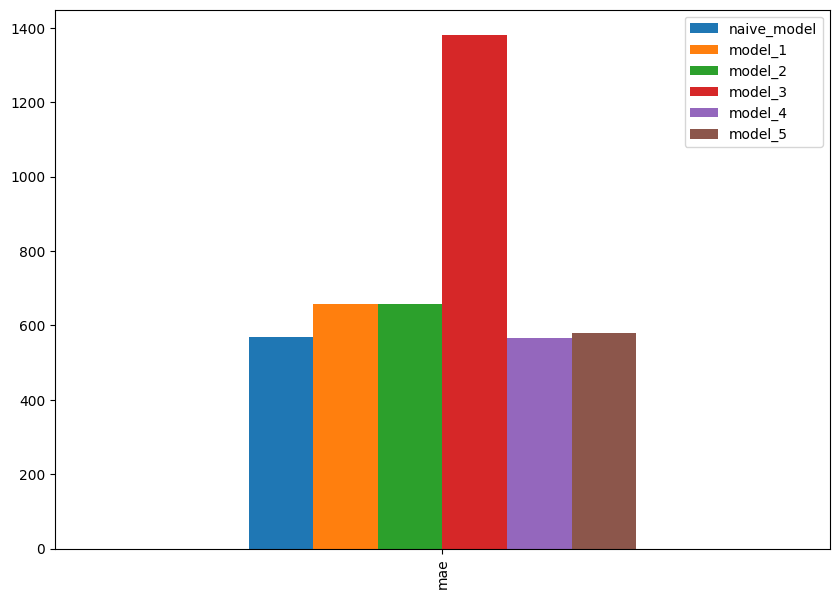

In [80]:
pd.DataFrame({
    "naive_model":naive_results['mae'],
    "model_1":model_1_results['mae'],
    "model_2":model_2_results['mae'],
    "model_3":model_3_results['mae'],
    "model_4":model_4_results['mae'],
    "model_5":model_5_results['mae']
},index=['mae']).plot(figsize=(10,7),kind='bar')

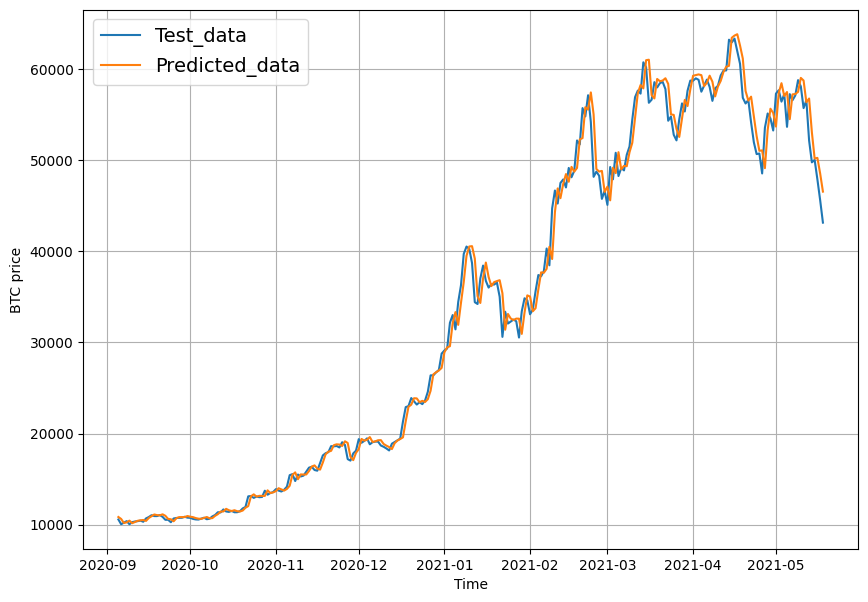

In [81]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],format='-',start=300,label='Test_data')
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_5_pred,format='-',start=300,label='Predicted_data')


# Make Multivariate Time series

In [82]:
bitcoin_price.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [83]:
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-11")



In [84]:
block_reward_2_days=(block_reward_3_datetime-bitcoin_price.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_price.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2414)

In [85]:
bitcoin_price_block=bitcoin_price.copy()
bitcoin_price_block['reward']=None

bitcoin_price_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_price_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_price_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [86]:
bitcoin_price_block.head(),bitcoin_price_block[1500:1505],bitcoin_price_block.tail()

(                Price reward
 Date                        
 2013-10-01  123.65499     25
 2013-10-02  125.45500     25
 2013-10-03  108.58483     25
 2013-10-04  118.67466     25
 2013-10-05  121.33866     25,
                  Price reward
 Date                         
 2017-11-09  7342.82375   12.5
 2017-11-10  7250.77000   12.5
 2017-11-11  6773.69500   12.5
 2017-11-12  6075.30125   12.5
 2017-11-13  5969.13000   12.5,
                    Price reward
 Date                           
 2021-05-14  49764.132082   6.25
 2021-05-15  50032.693137   6.25
 2021-05-16  47885.625255   6.25
 2021-05-17  45604.615754   6.25
 2021-05-18  43144.471291   6.25)

<Axes: xlabel='Date'>

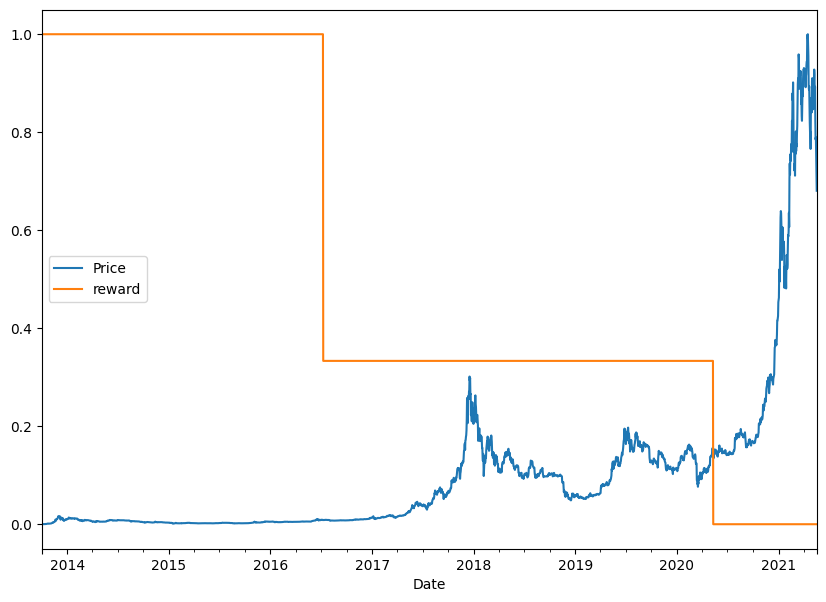

In [87]:
# Lets visualize ths block reward
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_price_block[["Price","reward"]]),
                                   columns=bitcoin_price_block.columns,
                                   index=bitcoin_price_block.index)

scaled_price_block_df.plot(figsize=(10,7))

In [88]:
HORIZON=1
WINDOW_SIZE=7

In [89]:
bitcoin_price_windowed=bitcoin_price_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_price_windowed[f"Price+{i+1}"]=bitcoin_price_windowed["Price"].shift(periods=i+1)

bitcoin_price_windowed.head(10)

,Price,reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [90]:
X=bitcoin_price_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_price_windowed.dropna()["Price"].astype(np.float32)
X.head(),y.head()

(            reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                 
 2013-10-08    25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09    25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10    25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11    25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12    25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.279663
 2013-10-12    125.927498
 Name: Price, 

In [91]:
# split train and test set
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

# Model_6 :Dense(multivariate time series)

In [92]:
tf.random.set_seed(42)

model_6=Sequential([
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(HORIZON,activation='linear')
],name="model_6_dense_multivariate")

model_6.compile(loss='mae',
                optimizer='adam',
                metrics=['mae','mse'])

model_6.fit(X_train,y_train,
            epochs=100,
            validation_data=(X_test,y_test),
            batch_size=128,
            callbacks=[create_model_checkpoint("model_6.keras")])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2976.1992 - mae: 2976.1992 - mse: 28550806.0000 - val_loss: 1087.3929 - val_mae: 1087.3929 - val_mse: 3953185.5000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 316.1149 - mae: 316.1149 - mse: 403964.8125 - val_loss: 1275.4121 - val_mae: 1275.4121 - val_mse: 4402931.5000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 208.9250 - mae: 208.9250 - mse: 212374.5312 - val_loss: 1031.1887 - val_mae: 1031.1887 - val_mse: 3304995.5000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 178.6345 - mae: 178.6345 - mse: 153290.8125 - val_loss: 1039.6731 - val_mae: 1039.6731 - val_mse: 3193594.2500
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 164.6213 - mae: 164.6213 - mse: 139936.9219 - val_loss: 882.7694 - val_mae: 882.7694 - val_mse: 2559422.7500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 151.2113 - mae: 151.2113 - mse: 121177.1797 - val_loss: 817.0406 - val_mae: 817.0406 - v

In [93]:
model_6.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 296.3068 - mae: 296.3068 - mse: 357715.3750


[587.859130859375, 587.859130859375, 1221457.0]

In [94]:
model_6_pred=make_pred(model_6,X_test)
model_6_results=calculate_results(tf.squeeze(y_test),model_6_pred)
model_6_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


{'mae': 587.85913,
 'mse': 1221457.1,
 'rmse': 1105.1956,
 'mape': 2.6551464,
 'mase': 1.0327057}

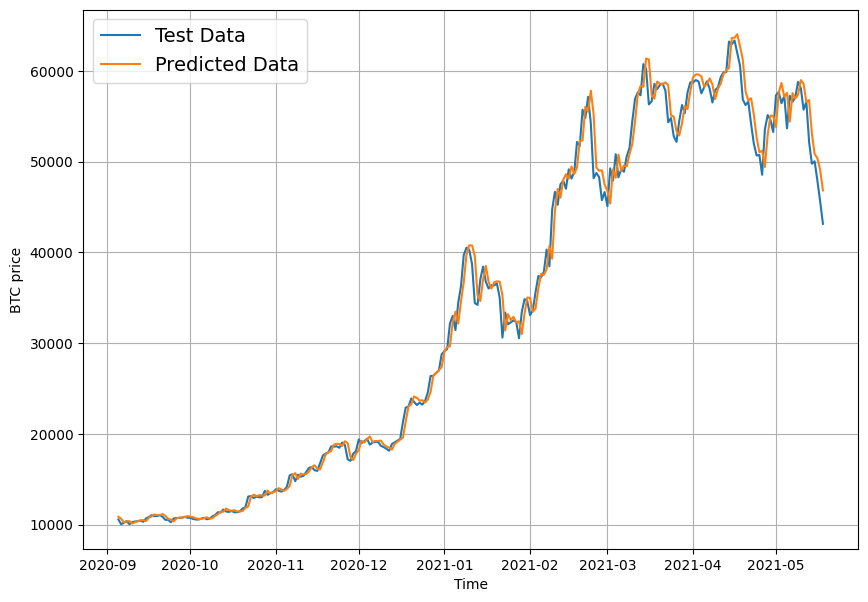

In [95]:
plt.figure(figsize=(10,7))

plot_time_series(X_test.index,y_test,format='-',start=300,label="Test Data")
plot_time_series(X_test.index,model_6_pred,format='-',start=300,label="Predicted Data")

In [96]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size=input_size
    self.theta_size=theta_size
    self.horizon=horizon
    self.n_neurons=n_neurons
    self.n_layers=n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self,inputs): # the call method is what runs when the layer is called
    x=inputs
    for layer in self.hidden: # pass inputs through each hidden layer
       x=layer(x)
    theta=self.theta_layer(x)

    # Output the backcast and forecast from theta
    backcast,forecast=theta[:, :self.input_size],theta[:, -self.horizon]
    return backcast,forecast




In [97]:
# set up dummy NBeatsBLock layer to represent inputs and outputs
dummy_nbeats_block_layer=NBeatsBlock(input_size=WINDOW_SIZE,
                                     theta_size=WINDOW_SIZE+HORIZON,# backcast + forecast

                                     horizon=HORIZON,
                                     n_neurons=128,
                                     n_layers=4)

In [98]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs=tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis=0)# input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [99]:
# Pass dummy inputs to dummy NBeatsBLock Layer
backcast,forecast=dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.8423768  -0.59529436  0.5948929   0.46252915 -1.225102   -0.34803104
  0.3060749 ]
Forecast: 1.2490923404693604


# Preparing data for tha N_BEATS algorihtm using tf.data

In [100]:
HORIZON=1
WINDOW_SIZE=7

In [101]:
bitcoin_price_nbeats=bitcoin_price.copy()

for i in range(WINDOW_SIZE):
  bitcoin_price_nbeats[f"price {i+1}"]=bitcoin_price["Price"].shift(periods=i+1)
bitcoin_price_nbeats.head(10)


,Price,price 1,price 2,price 3,price 4,price 5,price 6,price 7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [102]:
# Make features and labels
X=bitcoin_price_nbeats.dropna().drop("Price",axis=1)
y=bitcoin_price_nbeats.dropna()["Price"]

# Split into train and test data
split_size=int(len(X)*0.8)
X_train,y_train=X[:split_size],y[:split_size]
X_test,y_test=X[split_size:],y[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [103]:
# 1.turn train and test arrays into tensor datasets
train_features_dataset=tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset=tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset=tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset=tf.data.Dataset.from_tensor_slices(y_test)

# 2.Combine features and labels
train_dataset=tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset=tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# 3.Batch and Prefetch for optimal performance
BATCH_SIZE=1024

train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up hyperparameters for N-BEATS algorithm

  

In [104]:
#Values form N_BEATS paper
N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE *HORIZON
THETA_SIZE=INPUT_SIZE+HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)

## Building,compiling and fitting the N_Beats algorithm

In [105]:
from tensorflow.keras import layers

In [106]:
tf.random.set_seed(42)

# 1.Setup and instance of NbeatsBlock layer
n_beats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS,
                                name="InitialBlock"
                                )

# 2.Create an input layer for nbeats stack
stack_input=layers.Input(shape=(INPUT_SIZE,),name="stack_input")

# 3.Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals,forecast=n_beats_block_layer(stack_input)
# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)):

   #5. Use the NBeatsBlock to calculate the backcast as well as the forecast
   backcast,block_forecast=NBeatsBlock(
       input_size=INPUT_SIZE,
       theta_size=THETA_SIZE,
       horizon=HORIZON,
       n_neurons=N_NEURONS,
       n_layers=N_LAYERS,
       name=f"NBeatsBlock_{i}"
   )(residuals)

   # 6.Create the double residual stacking
   residuals=layers.subtract([residuals,backcast],name=f"subtract_{i}")
   forecast=layers.add([forecast,block_forecast],name=f"add_{i}")

# 7. put tha stack model together
model_7=tf.keras.Model(inputs=stack_input,outputs=forecast,name="model_7_NBEATS")

# 8.Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer="adam",
                metrics=['mae','mse'])

# 9.Fit the model
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=50,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=50,
                                                            verbose=1)])


Epoch 1/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - loss: 3199.4263 - mae: 3162.4766 - mse: 31343268.0000 - val_loss: 12434.9297 - val_mae: 12434.9297 - val_mse: 272972480.0000 - learning_rate: 0.0010
Epoch 2/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 1499.3577 - mae: 2838.1365 - mse: 26927192.0000 - val_loss: 14413.1387 - val_mae: 14413.1387 - val_mse: 366193376.0000 - learning_rate: 0.0010
Epoch 3/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 2035.5743 - mae: 2833.9739 - mse: 20866672.0000 - val_loss: 16883.7344 - val_mae: 16883.7344 - val_mse: 502087264.0000 - learning_rate: 0.0010
Epoch 4/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 1851.1713 - mae: 2456.4888 - mse: 14889737.0000 - val_loss: 11751.9912 - val_mae: 11751.9912 - val_mse: 243938448.0000 - learning_rate: 0.0010
Epoch 5/5000
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 924.2216 - mae: 1054.8499 - mse: 2658268.7500 - val_loss: 6272.1826 - val_mae: 6272.1826 - val_mse: 70901744.0000 - learning_rate: 0.0010
Epoc

KeyboardInterrupt: 

In [107]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step - loss: 641.1168 - mae: 641.1168 - mse: 1425627.3750


[641.1168212890625, 641.1168212890625, 1425627.375]

In [108]:
model_7_preds=make_pred(model_7,test_dataset)
model_7_results=calculate_results(tf.squeeze(y_test),model_7_preds)
model_7_results

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


{'mae': 641.1166,
 'mse': 1425627.5,
 'rmse': 1193.9965,
 'mape': 2.8854187,
 'mase': 1.1262640814597948}

In [109]:
model_7_preds.shape,y_test.shape

(TensorShape([556]), (556,))

# Model_8: Creating an ensemble (stacking different models together)

## Constructing and fitting an ensemble of models(using different different loss functions )



In [110]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=['mae','mse','mape']):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  ensemble_models=[]

  # Create num_iter number of models per loss functions
  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs,model_number: {i}")

      model=tf.keras.Sequential([
          layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          layers.Dense(128,kernel_initializer="he_normal",activation="relu"),
          layers.Dense(HORIZON)
      ])
      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append the fitted model to list of ensemble models
      ensemble_models.append(model)
  return ensemble_models


In [111]:
%%time
# Get the list of trained ensemble models
ensemble_models=get_ensemble_models(num_iter=5,
                                    num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs,model_number: 0
Optimizing model by reducing: mse for 1000 epochs,model_number: 0

Epoch 387: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 487: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs,model_number: 0

Epoch 208: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 308: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs,model_number: 1

Epoch 696: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 796: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs,model_number: 1

Epoch 249: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 349: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:

In [112]:
def make_ensemble_pred(ensemble_models,data):
  ensemble_preds=[]
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [113]:
ensemble_preds=make_ensemble_pred(ensemble_models=ensemble_models,
                                  data=test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8745.403,  8830.954,  9108.508, ..., 50215.76 , 48861.594,
        46098.758],
       [ 8753.475,  8733.393,  8997.871, ..., 50775.184, 48646.246,
        46376.867],
       [ 8733.063,  8697.273,  9058.13 , ..., 49505.51 , 48575.88 ,
        45686.04 ],
       ...,
       [ 8797.241,  8741.434,  9030.671, ..., 49804.957, 48680.49 ,
        45498.46 ],
       [ 8737.299,  8737.379,  8986.804, ..., 50088.387, 49016.445,
        46421.703],
       [ 8795.63 ,  8790.347,  9056.643, ..., 49849.67 , 49030.03 ,
        45971.57 ]], dtype=float32)>

In [114]:
ensemble_results=calculate_results(y_true=y_test,
                                   y_pred=np.mean(ensemble_preds,axis=0))

ensemble_results

{'mae': 569.9798,
 'mse': 1142182.5,
 'rmse': 1068.7294,
 'mape': 2.5771296,
 'mase': 1.0012965921321961}

In [115]:
# find the upper and lower bounds
def get_upper_lower(preds):# 1.take the predictions from a number of randomly initialized models
  std=tf.math.reduce_std(preds,axis=0) # measure the std
  intervals=std*1.96 # multiply the std with 1.96
  pred_mean=tf.math.reduce_mean(preds,axis=0)
  lower,upper=pred_mean-intervals,intervals+pred_mean

  return lower,upper


In [116]:
# get the lower and the upper intervals
lower,upper=get_upper_lower(ensemble_preds)

In [117]:
lower.shape,upper.shape,y_test.shape, np.mean(ensemble_preds,axis=0).shape

(TensorShape([556]), TensorShape([556]), (556,), (556,))

In [118]:
X_test.index.shape

(556,)

# Model_9: Predicting the future data of bitcoin prices

In [119]:
bitcoin_price_windowed.head(10)

,Price,reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [120]:
X=bitcoin_price_windowed.dropna().drop(["Price","reward"],axis=1).astype(np.float32)
y=bitcoin_price_windowed.dropna()["Price"].astype(np.float32)
len(X),len(y)

(2780, 2780)

In [121]:
# conver into batches and fetches
X_dataset=tf.data.Dataset.from_tensor_slices(X)
y_dataset=tf.data.Dataset.from_tensor_slices(y)

#put together into zip
train_dataset=tf.data.Dataset.zip((X_dataset,y_dataset))
BATCH_SIZE=1024
train_dataset=train_dataset.batch(batch_size=BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [122]:
tf.random.set_seed(42)
model_9=Sequential([
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(HORIZON)
])
model_9.compile(loss='mae',
                optimizer='adam',
                metrics=['mae','mse'])
model_9.fit(train_dataset,
            epochs=100
             )

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3017.9055 - mae: 3017.9055 - mse: 40875644.0000
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1220.1327 - mae: 1220.1327 - mse: 5933594.0000
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 523.7598 - mae: 523.7598 - mse: 2500866.7500
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 782.8881 - mae: 782.8881 - mse: 3560487.2500
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 333.5243 - mae: 333.5243 - mse: 627887.8125
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 456.3875 - mae: 456.3875 - mse: 1670207.0000
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 521.0880 - mae: 521.0880 - mse: 1636969.8750
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 219.3656 - mae: 219.3656 - mse: 361763.7500
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 368.0447 - mae: 368.0447 - mse: 1095191.3750
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 316.1691 - ma

In [124]:
model_9_pred=make_pred(model_9,X_test)
model_9_results=calculate_results(tf.squeeze(y_test),model_9_pred)
model_9_results

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


{'mae': 613.0789,
 'mse': 1299954.8,
 'rmse': 1140.1556,
 'mape': 2.7286248,
 'mase': 1.0770096019958768}

In [126]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [135]:
# Make forecasts into future of the price of Bitcoin
INTO_FUTURE = 14
WINDOW_SIZE = 7
future_forecast = make_future_forecast(values=y,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicting on: 
 Date
2021-05-12    56573.554688
2021-05-13    52147.820312
2021-05-14    49764.132812
2021-05-15    50032.691406
2021-05-16    47885.625000
2021-05-17    45604.617188
2021-05-18    43144.472656
Name: Price, dtype: float32 -> Prediction: 55117.7421875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicting on: 
 [52147.82  49764.133 50032.69  47885.625 45604.617 43144.473 55117.742] -> Prediction: 52135.0546875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicting on: 
 [49764.133 50032.69  47885.625 45604.617 43144.473 55117.742 52135.055] -> Prediction: 48098.3359375

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicting on: 
 [50032.69  47885.625 45604.617 43144.473 55117.742 52135.055 48098.336] -> Prediction: 49542.57421875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicting on: 
 [47885.625 45604.617 43144.473 55117.742 52135.055 48098.336 49542.574] -> Prediction: 47329.76171875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicting on: 
 [45604.6

In [136]:
future_forecast[:10]

[55117.742,
 52135.055,
 48098.336,
 49542.574,
 47329.76,
 44848.906,
 47397.836,
 54308.586,
 50743.805,
 47504.402]

In [127]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date


In [129]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [130]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [132]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=14)
next_time_steps


array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [137]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-18', '2021-05-19', '2021-05-20',
        '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
        '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
        '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01'],
       dtype='datetime64[D]'),
 array([43144.473, 55117.742, 52135.055, 48098.336, 49542.574, 47329.76 ,
        44848.906, 47397.836, 54308.586, 50743.805, 47504.402, 49040.61 ,
        46829.652, 45659.098, 49889.117], dtype=float32))

In [139]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
# Ensure both arrays have the same length
next_time_steps = next_time_steps[:len(future_forecast)]  # Or adjust future_forecast length accordingly

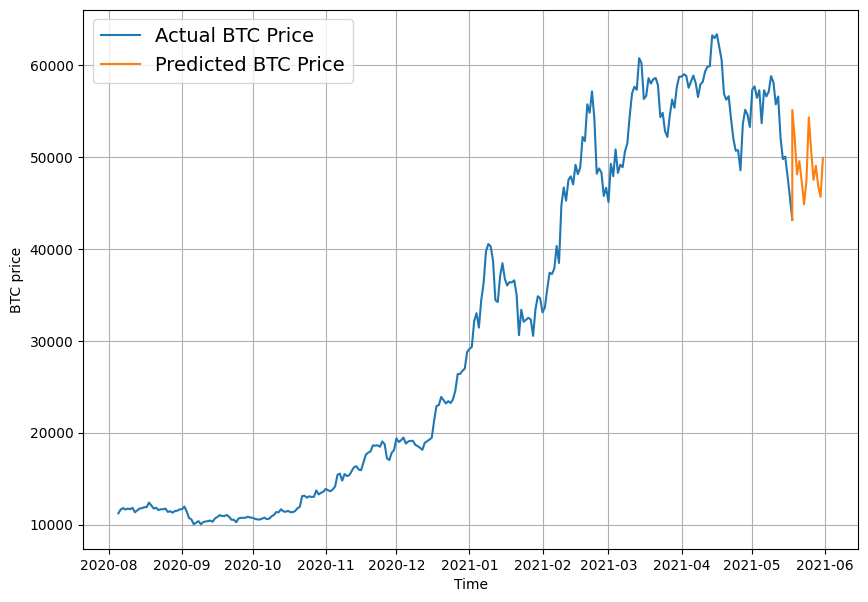

In [140]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")
